In [10]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# retrieve dataframe from previous work
df = pd.read_csv('../../../../GitHub_Data/Dota2Matches/preparedMatchSkill.csv',index_col='match_id')
df.head()

,Rad_Win,dire_trueskill_mu_mean,dire_trueskill_mu_sum,dire_trueskill_sigma_mean,radiant_trueskill_mu_mean,radiant_trueskill_mu_sum,radiant_trueskill_sigma_mean
match_id,,,,,,,
1636204962,0,25.357769,228.219917,5.307879,24.991777,224.925992,4.645305
1636322679,1,25.429459,152.576754,5.577277,29.280546,175.683275,7.656243
1637385965,0,28.605807,57.211613,4.346619,23.977755,47.955511,7.380554
1637623870,0,27.253514,545.070286,5.717296,24.122732,482.454634,6.343619
1637739731,1,25.028565,400.457043,6.378492,28.637235,458.195754,6.417469


<AxesSubplot:>

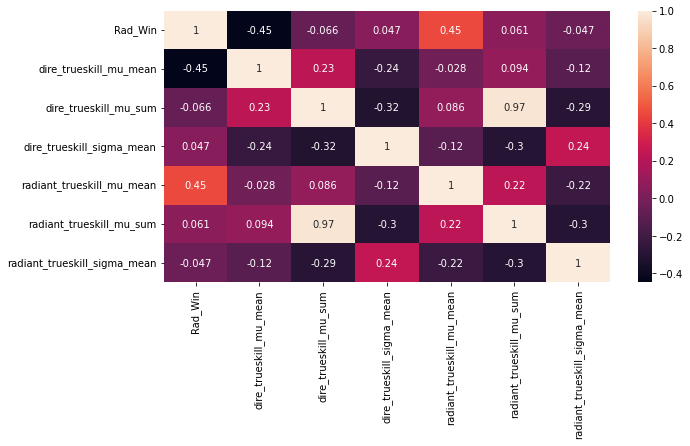

In [3]:
# feature selection
plt.figure(figsize=(10,5))
feature_correlation = df.corr()
sns.heatmap(feature_correlation, annot=True)
#Looks like sum trueskill_mean is the best one, but only .45 overall

In [4]:
df = df[['Rad_Win', 'radiant_trueskill_mu_mean','dire_trueskill_mu_mean']]
df.head()

,Rad_Win,radiant_trueskill_mu_mean,dire_trueskill_mu_mean
match_id,,,
1636204962,0,24.991777,25.357769
1636322679,1,29.280546,25.429459
1637385965,0,23.977755,28.605807
1637623870,0,24.122732,27.253514
1637739731,1,28.637235,25.028565


In [28]:
x_train, x_test, y_train, y_test = train_test_split(df[['radiant_trueskill_mu_mean','dire_trueskill_mu_mean']].to_numpy(), \
     df['Rad_Win'].to_numpy(), train_size=.75)

In [6]:
model = LogisticRegression(solver='saga')
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

<AxesSubplot:>

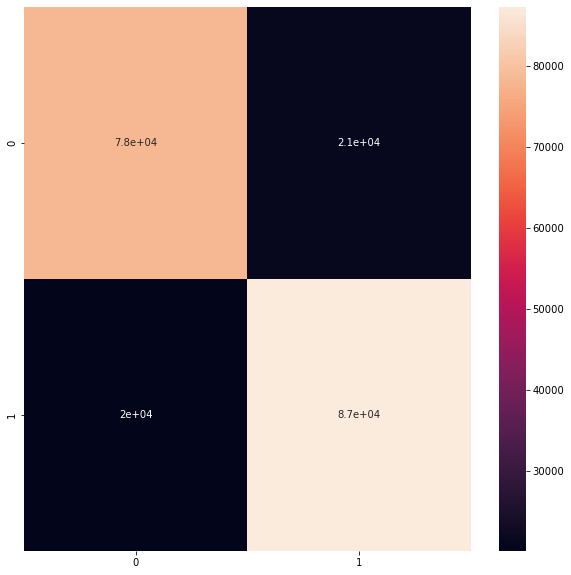

In [7]:
c_matrix = metrics.confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,10))
sns.heatmap(c_matrix,annot=True)

In [8]:
accuracy = metrics.accuracy_score(y_test,y_predicted)
print(accuracy)

0.7991586887148245


In [11]:
# Curious about select_kbest. Want to try that function out.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
xtop_train = SelectKBest(chi2,k=2).fit_transform(x_train,y_train)
xtop_train

array([[25.87669348, 25.57321743],
       [27.23061969, 24.50351801],
       [26.13227993, 23.71643263],
       ...,
       [26.10633131, 22.90551456],
       [27.48151418, 26.54991725],
       [27.23454314, 24.99671191]])

In [21]:
dfRetest = pd.read_csv('../../../../GitHub_Data/Dota2Matches/preparedMatchSkill.csv',index_col='match_id')
dfRetest.head()

,Rad_Win,dire_trueskill_mu_mean,dire_trueskill_mu_sum,dire_trueskill_sigma_mean,radiant_trueskill_mu_mean,radiant_trueskill_mu_sum,radiant_trueskill_sigma_mean
match_id,,,,,,,
1636204962,0,25.357769,228.219917,5.307879,24.991777,224.925992,4.645305
1636322679,1,25.429459,152.576754,5.577277,29.280546,175.683275,7.656243
1637385965,0,28.605807,57.211613,4.346619,23.977755,47.955511,7.380554
1637623870,0,27.253514,545.070286,5.717296,24.122732,482.454634,6.343619
1637739731,1,25.028565,400.457043,6.378492,28.637235,458.195754,6.417469


dfBest = SelectKBest(chi2,k=2).fit_transform(dfRetest.loc[:,dfRetest.columns != 'Rad_Win'], dfRetest['Rad_Win'])
dfBest # Interesting, SelectKBest is suggesting the Sums instead of the mean. Does that make sense since some teams have players drop?

In [29]:
x_train_retest, x_test_retest, y_train_retest, y_test_retest = train_test_split(dfRetest[['radiant_trueskill_mu_sum','dire_trueskill_mu_sum']].to_numpy(), \
     dfRetest['Rad_Win'].to_numpy(), train_size=.75)

<AxesSubplot:>

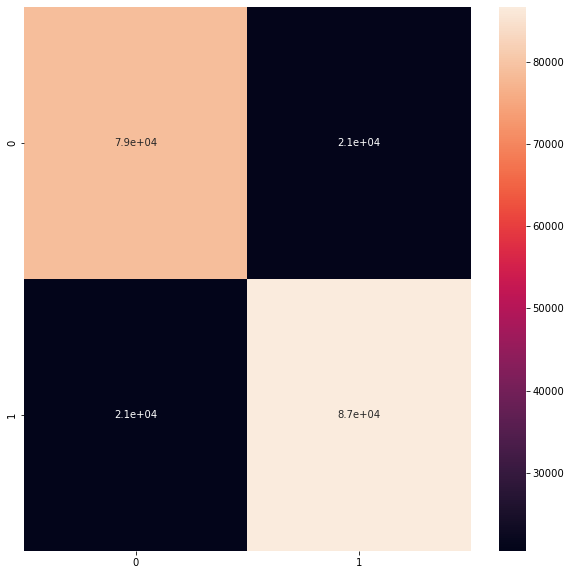

In [30]:
model_retest = LogisticRegression(solver='saga')
model_retest.fit(x_train_retest,y_train_retest)
y_predicted_retest = model.predict(x_test_retest)
c_matrix_retest = metrics.confusion_matrix(y_test_retest, y_predicted_retest)
plt.figure(figsize=(10,10))
sns.heatmap(c_matrix_retest,annot=True)

In [46]:
accuracy_retest = metrics.accuracy_score(y_test_retest,y_predicted_retest)
print('With mean trueskillmu:',accuracy)
print('With sum trueskillmu',accuracy_retest) # shows improvement

With mean trueskillmu: 0.7991586887148245
With sum trueskillmu 0.8002224156271154
